In [140]:
import json 
import pandas as pd 
import re
import numpy as np
# from mtgsdk import Card
# import numpy as np

from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import hvplot.pandas
%matplotlib inline


# set index to link 
# apply to split string into list 
# remove number and space using regex 

# standard_df["deck list"] = standard_list["deck list"].apply(deck_list_cleaner)

# standard_df["deck list"] = standard_list["deck list"].str.split(pat ="\r\n")


# standard_df["deck list "] 

# def deck_list_cleaner(word_list): 
#    output=[word in word_list]
#    return output


In [123]:
UNWANTED_COLUMNS = ['index', 'artist', 'availability', 'borderColor',
       'colors', 'convertedManaCost', 'edhrecRank', 'finishes', 'flavorText',
       'foreignData', 'frameVersion', 'hasFoil', 'hasNonFoil', 'identifiers',
       'isPromo', 'isReprint', 'isStarter', 'keywords', 'language', 'layout',
       'legalities','number',
       'printings', 'promoTypes', 'purchaseUrls', 'rarity', 'rulings',
       'securityStamp', 'setCode', 'subtypes', 'supertypes', 'text','uuid', 'boosterTypes', 'originalText',
       'originalType', 'signature', 'originalReleaseDate', 'variations',
       'isOnlineOnly', 'isReserved', 'frameEffects', 'faceConvertedManaCost',
       'faceManaValue', 'faceName', 'leadershipSkills', 'otherFaceIds', 'side',
       'isOversized', 'reverseRelated', 'duelDeck', 'isTextless',
       'relatedCards', 'watermark', 'loyalty', 'isAlternative', 'isFunny',
       'isFullArt', 'isTimeshifted', 'rebalancedPrintings', 'asciiName',
       'isRebalanced', 'originalPrintings', 'colorIndicator', 'hand', 'life',
       'isStorySpotlight', 'flavorName', 'attractionLights',
       'hasContentWarning', 'hasAlternativeDeckLimit', 'faceFlavorName',
       'cardParts',"colorIdentity", "types"]
COLOR_COLUMNS = ["colorIdentity","manaCost", "power", "toughness"]
FILE_NAME = "second_transposed.feather"
LETTERS = ['B','C','G','H','P','R','S','U','W','X','Y','Z']

In [124]:
mtg_df = pd.read_feather(FILE_NAME).drop_duplicates("name", keep="first").drop(columns=UNWANTED_COLUMNS)
# mtg_df.to_json("mtgData.json")
mtg_df.dropna(inplace=True)
mtg_df

,manaCost,manaValue,name,power,toughness,type
0,{5}{U}{U},7.0,Sphinx of the Final Word,5,5,Creature — Sphinx
1,{1}{R}{R},3.0,Goblin King,2,2,Creature — Goblin
3,{3}{R}{G},5.0,Deadshot Minotaur,3,4,Creature — Minotaur
5,{1}{U},2.0,Merfolk Looter,1,1,Creature — Merfolk Rogue
7,{1}{W},2.0,War Priest of Thune,2,2,Creature — Human Cleric
...,...,...,...,...,...,...
77631,{1}{U},2.0,Champion's Drake,1,1,Creature — Drake
77652,{1}{B},2.0,Headhunter,1,1,Creature — Human Cleric
77661,{4}{B},5.0,Plague Dogs,3,3,Creature — Phyrexian Zombie Dog
77705,{7},7.0,Aether Searcher,6,4,Artifact Creature — Construct


In [128]:


mtg_df["manaCost"]=mtg_df["manaCost"].str.replace("{", "")
mtg_df["manaCost"]=mtg_df["manaCost"].str.replace("}", "")


mtg_df = mtg_df[["name", "manaCost", "power", "toughness", "type"]]
mtg_df

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be 

,name,manaCost,power,toughness,type
0,Sphinx of the Final Word,5UU,5,5,Creature — Sphinx
1,Goblin King,1RR,2,2,Creature — Goblin
3,Deadshot Minotaur,3RG,3,4,Creature — Minotaur
5,Merfolk Looter,1U,1,1,Creature — Merfolk Rogue
7,War Priest of Thune,1W,2,2,Creature — Human Cleric
...,...,...,...,...,...
77631,Champion's Drake,1U,1,1,Creature — Drake
77652,Headhunter,1B,1,1,Creature — Human Cleric
77661,Plague Dogs,4B,3,3,Creature — Phyrexian Zombie Dog
77705,Aether Searcher,7,6,4,Artifact Creature — Construct


In [174]:

result = mtg_df.to_json("temp2.json", orient="split")


# mtg_df["set"]mtg_df.values.tolist()


In [87]:
def parse_mana_cost(raw):
    if raw is None: 
        return None
    else: 
        colors = {k: raw.count(k) for k in LETTERS}
        return pd.Series(colors)       

In [88]:
[parse_mana_cost(value) for value in mtg_df["manaCost"].values.tolist()] 

[B    0
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    2
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    0
 H    0
 P    0
 R    2
 S    0
 U    0
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    1
 H    0
 P    0
 R    1
 S    0
 U    0
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    1
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    0
 W    1
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    1
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    0
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    0
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    2
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    1
 C    0
 G    0
 H    0
 P    0
 R    0
 S    0
 U    0
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 B    1
 C    0
 G    0
 H    0
 P    0
 R    1
 S    0
 U    1
 W    0
 X    0
 Y    0
 Z    0
 dtype: int64,
 

In [89]:
parsed_series = mtg_df["manaCost"].apply(parse_mana_cost)
mana_cost_colors_df = pd.DataFrame(parsed_series)
mana_cost_colors_df
black_white_df=mana_cost_colors_df[["B", "W"]]
red_green_df=mana_cost_colors_df[["R", "G"]]

# KMeans Algorithm For Mana Cost


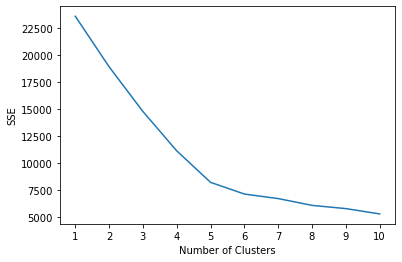

In [90]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(mana_cost_colors_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# KMeans clustering if k= 6

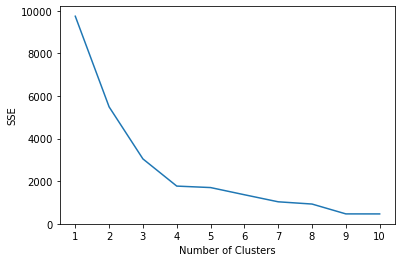

In [91]:
#Kmeans for RG Cards 
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(red_green_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# KMeans clustering if k= 6

In [92]:
kmeans5 = KMeans(n_clusters=5)

x = mana_cost_colors_df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]].values
y_kmeans5=kmeans5.fit_predict(x)
print(y_kmeans5)


[0 1 3 ... 4 2 2]


In [93]:
kmeans5.cluster_centers_

array([[ 1.31093814e-01,  1.84314369e-18,  9.42236788e-03,
        -1.35525272e-19,  8.19336338e-04,  8.80786563e-02,
        -1.35525272e-19,  1.28963540e+00,  4.17861532e-02,
         8.19336338e-04,  0.00000000e+00,  0.00000000e+00],
       [ 3.20073160e-03,  7.58941521e-19,  4.11522634e-03,
        -1.21972744e-19,  1.37174211e-03,  1.31687243e+00,
        -1.21972744e-19,  1.37174211e-03,  2.05761317e-02,
         2.74348422e-03,  0.00000000e+00,  0.00000000e+00],
       [ 5.01066098e-02,  2.39872068e-03,  8.12899787e-02,
         2.66524520e-04,  5.33049041e-04,  6.82302772e-02,
         2.66524520e-04,  6.76972281e-02,  9.64552239e-01,
         4.26439232e-03,  0.00000000e+00,  0.00000000e+00],
       [ 7.86828423e-02,  3.46944695e-18,  1.33171577e+00,
        -1.35525272e-19,  6.93240901e-04,  9.91334489e-02,
        -1.35525272e-19,  7.03639515e-02,  2.11438475e-02,
         1.62911612e-02,  0.00000000e+00,  0.00000000e+00],
       [ 1.34637562e+00,  1.84314369e-18,  1.6474464

In [94]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 7)
pca.fit(x)
pca_df=pca.transform(x)


In [95]:
km = KMeans(n_clusters=7)
km.fit(x)

KMeans(n_clusters=7)

In [96]:
pca_df

array([[-2.85317717e-01, -4.60268982e-01, -3.80717290e-01, ...,
         2.92510563e-01, -2.50500520e-03, -1.56850232e-04],
       [-2.30109870e-01, -6.21785673e-01,  1.63897180e+00, ...,
         2.68558959e-01, -4.21818160e-03, -1.26628980e-03],
       [ 7.09477723e-01,  1.73755612e-02,  8.09835604e-01, ...,
         2.27564188e-01, -1.19967384e-02, -1.04973435e-03],
       ...,
       [-5.47393587e-01,  6.73531119e-01, -8.48482409e-02, ...,
        -2.07171600e-01, -3.34843938e-03, -2.59499052e-03],
       [-3.19930937e-02, -4.80460323e-02, -9.63098906e-03, ...,
        -6.35854783e-01, -5.75575034e-03, -4.40726449e-04],
       [-7.62498436e-02, -5.28075968e-01, -5.39174704e-01, ...,
        -1.59227973e-01, -1.96965343e-03, -3.14121786e-04]])

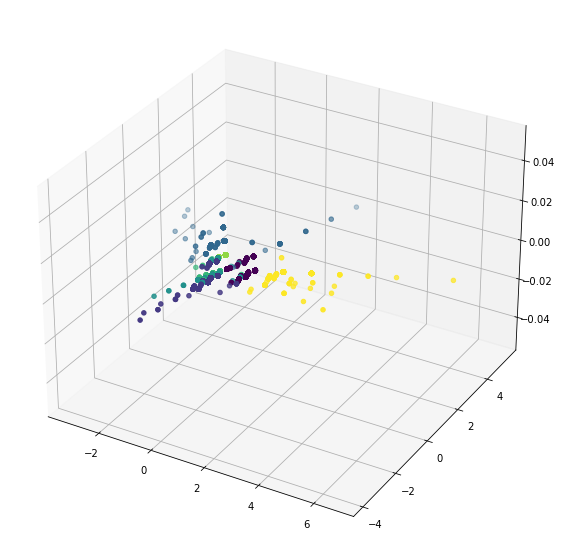

In [97]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(pca_df[:,0], pca_df[:,1],c=km.labels_)

# Kmeans Black and White Cards

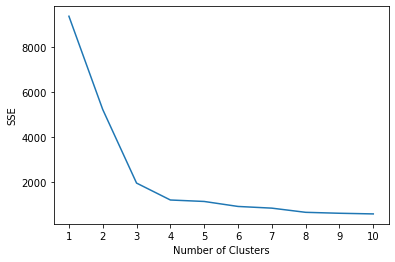

In [98]:
# Kmeans for BW Cards
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(black_white_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# KMeans clustering if k= 6

In [100]:
kmeans5 = KMeans(n_clusters=4)

x = black_white_df.iloc[:,[0,1]].values
y_kmeans5=kmeans5.fit_predict(x)
print(y_kmeans5)


[1 1 1 ... 0 1 3]


In [101]:
kmeans5.cluster_centers_

array([[1.00000000e+00, 1.01167315e-01],
       [2.38697950e-15, 4.66293670e-15],
       [7.46268657e-02, 2.11044776e+00],
       [1.33226763e-15, 1.00000000e+00],
       [2.14304291e+00, 5.20156047e-03]])

In [105]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
pca.fit(x)
pca_df=pca.transform(x)


In [106]:
km = KMeans(n_clusters=4)
km.fit(x)

KMeans(n_clusters=4)

In [107]:
pca_df

array([[-0.06803277, -0.40152012],
       [-0.06803277, -0.40152012],
       [-0.06803277, -0.40152012],
       ...,
       [ 0.73708206,  0.19159884],
       [-0.06803277, -0.40152012],
       [-0.66115173,  0.40359472]])

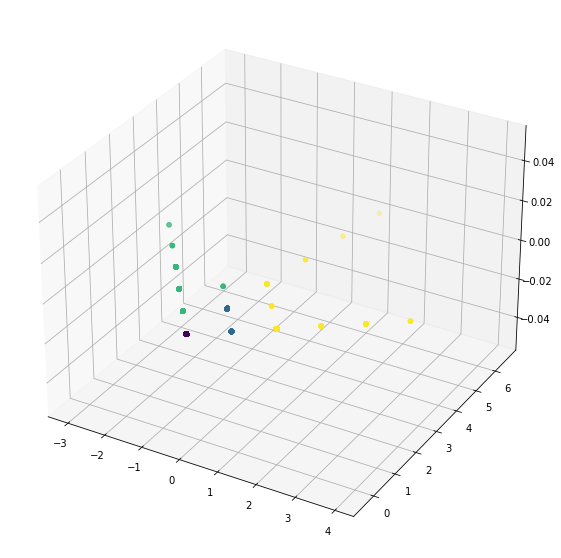

In [108]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(pca_df[:,0], pca_df[:,1],c=km.labels_)

# KMeans For Red and Green and Blue Cards 

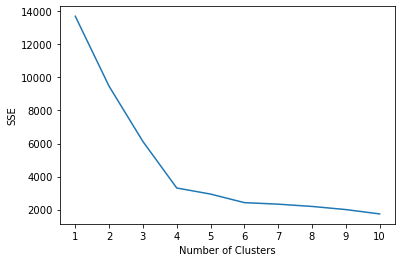

In [175]:
# Kmeans for BW Cards
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(mana_cost_colors_df[["U", "W", "B"]])
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

new_df = mana_cost_colors_df[["U", "W", "B"]]
# KMeans clustering if k= 6

In [176]:
kmeans5 = KMeans(n_clusters=4)

x = new_df.iloc[:, [0,1,2]].values
y_kmeans5=kmeans5.fit_predict(x)
print(y_kmeans5)

[3 1 1 ... 0 1 2]


In [177]:
kmeans5.cluster_centers_

array([[3.07101727e-03, 1.53550864e-03, 1.32667946e+00],
       [1.83186799e-15, 1.22124533e-15, 2.22044605e-15],
       [1.13745594e-01, 1.23838513e+00, 9.00352451e-02],
       [1.27668760e+00, 1.96232339e-03, 1.07535322e-01]])

In [178]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 3)
pca.fit(x)
pca_df=pca.transform(x)


In [179]:
km = KMeans(n_clusters=4)
km.fit(x)

KMeans(n_clusters=4)

In [180]:
pca_df

array([[-0.42704075, -1.56515347,  0.73973505],
       [-0.05477457, -0.0257367 , -0.48158141],
       [-0.05477457, -0.0257367 , -0.48158141],
       ...,
       [ 0.78793495,  0.16875329,  0.02042886],
       [-0.05477457, -0.0257367 , -0.48158141],
       [-0.55994299,  0.58231153,  0.13085816]])

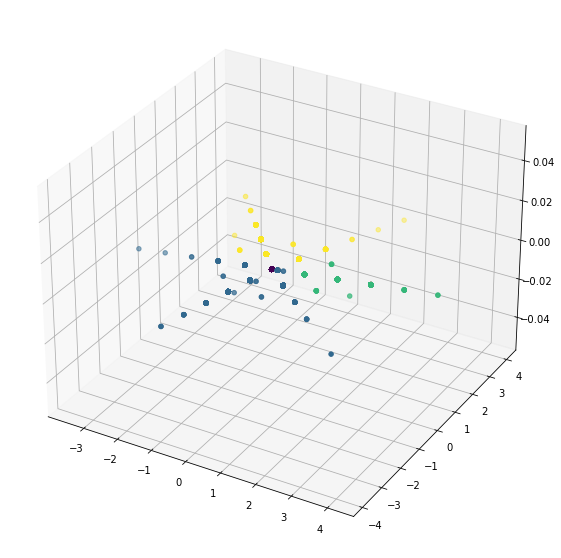

In [181]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(pca_df[:,0], pca_df[:,1],c=km.labels_)

# Kmeans Black and Green 

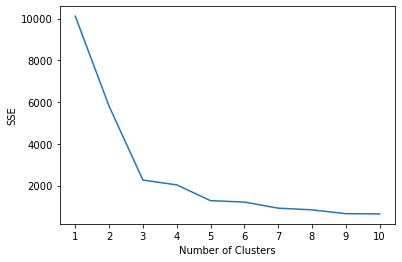

In [145]:
# Kmeans for BG Cards
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(mana_cost_colors_df[["B", "G"]])
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()



In [146]:
kmeans5 = KMeans(n_clusters=3)

x = red_green_df.iloc[:, [0,1]].values
y_kmeans5=kmeans5.fit_predict(x)
print(y_kmeans5)

[2 0 0 ... 2 2 2]


In [147]:
kmeans5.cluster_centers_

array([[1.25850785e+00, 1.19437173e-01],
       [2.41796200e-03, 1.31882556e+00],
       [2.05391260e-15, 3.49720253e-15]])

In [148]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
pca.fit(x)
pca_df=pca.transform(x)


In [150]:
km = KMeans(n_clusters=3)
km.fit(x)
pca_df

array([[-0.10441122, -0.40199059],
       [-1.18757889,  1.2793029 ],
       [ 0.19465169,  0.98023999],
       ...,
       [-0.10441122, -0.40199059],
       [-0.10441122, -0.40199059],
       [-0.10441122, -0.40199059]])

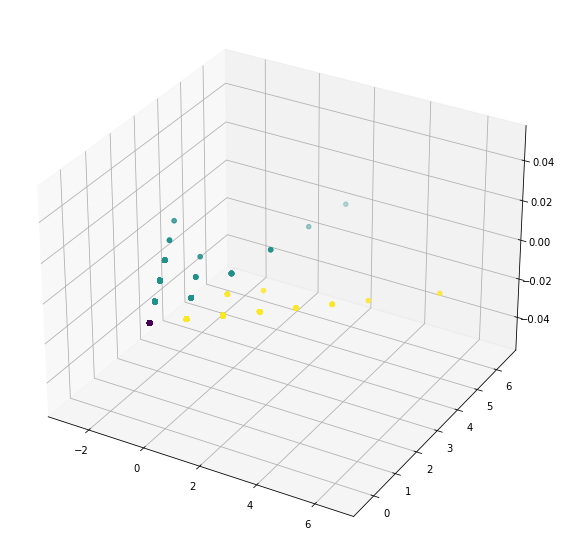

In [151]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection="3d")
ax.scatter(pca_df[:,0], pca_df[:,1],c=km.labels_)

# Reference 


In [ ]:
# clean = raw.replace('{', '').replace('}', '')

In [ ]:
# "hello".count("l")
# '\d*
def count_digit_groups(s): 
    matches = re.findall('(\d+)', s)
    len_groups = len(matches)
    if len_groups > 1: 
        print(s)    
    return len_groups

In [ ]:
count_digit_groups("hello")

0

In [ ]:
raw_values = [value for value in mtg_df["manaCost"].values.tolist() if value is not None]
big_string = "".join(raw_values)
character_set = set(big_string)

In [ ]:
test_df.join(mana_cost_colors_df)

NameError: name 'test_df' is not defined

In [ ]:
parse_mana_cost(mtg_df["manaCost"][0])

In [ ]:
digit_groups = [count_digit_groups(value) for value in mtg_df["manaCost"].values.tolist() if value is not None]

In [ ]:
print(min(digit_groups), max(digit_groups))

In [ ]:
# When the return value was a dictionary 

parsed_series=test_df["manaCost"].apply(parse_mana_cost)
parsed_series
# pd.DataFrame(parsed_series.tolist(), index=parsed_series.index)